# Description
### Context

Data has been collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system.

- Age: Age in years when a woman is pregnant.
- SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
- HeartRate: A normal resting heart rate in beats per minute.
- Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import math
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
!ls

Maternal_Health_Risk.csv cascading.ipynb          heart_train.txt
SVMforModel3.ipynb       code_for_errors.ipynb
archive                  heart_test.txt


In [29]:
df_train = pd.read_csv('heart_train.txt', header=None)
df_test = pd.read_csv('heart_test.txt', header=None)

In [25]:
df_train.iloc[:,18:]

,18
0,93.879409
1,74.663033
2,95.518324
3,65.506963
4,97.477088
...,...
258497,75.685779
258498,77.307214
258499,74.760202
258500,61.172462


In [2]:
df_train = pd.read_csv('Maternal_Health_Risk.csv')
df_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
df_train['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [5]:
risk_map = {'high risk':2, 'mid risk': 1, 'low risk': 0}

In [14]:
df_train['RiskLevel_num'] = df_train['RiskLevel'].map(risk_map)
df_train = df_train.drop(columns=['RiskLevel'])

In [40]:
df_train['RiskLevel_num'].value_counts()

0    406
1    336
2    272
Name: RiskLevel_num, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['RiskLevel_num']), df_train['RiskLevel_num'], test_size=0.3, random_state=42)

In [21]:
X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
177,54,140,100,15.0,98.0,66
467,50,140,90,15.0,98.0,90
507,18,120,80,7.9,102.0,76
486,38,135,60,7.9,101.0,86
328,35,90,70,6.9,98.0,70
...,...,...,...,...,...,...
106,50,140,90,15.0,98.0,90
270,22,120,90,7.0,98.0,82
860,17,90,63,6.9,101.0,70
435,65,130,80,15.0,98.0,86


### Divide dataset into 3 parts

In [58]:
X_train_1 = X_train[['BS', 'BodyTemp', 'HeartRate']]
X_train_2 = X_train[['SystolicBP', 'DiastolicBP']]
X_train_3 = X_train[['Age']]

X_test_1 = X_test[['BS', 'BodyTemp', 'HeartRate']]
X_test_2 = X_test[['SystolicBP', 'DiastolicBP']]
X_test_3 = X_test[['Age']]

In [59]:
svr = SVR(kernel='rbf', gamma='scale', coef0=0.0, epsilon=0.001, max_iter=-1)
start_time = time.time()
print('Start training')
svr.fit(X_train_1, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
train_pred_y = svr.predict(X_train_1)
test_pred_y = svr.predict(X_test_1)

Start training
--- 0.03255295753479004 seconds ---


In [60]:
X_train_2['pred1'] = train_pred_y.round()
X_test_2['pred1'] = test_pred_y.round()
X_train_2

,SystolicBP,DiastolicBP,pred1
177,140,100,1.0
467,140,90,2.0
507,120,80,1.0
486,135,60,1.0
328,90,70,1.0
...,...,...,...
106,140,90,2.0
270,120,90,1.0
860,90,63,1.0
435,130,80,2.0


In [61]:
X_train_2['pred1'].value_counts()

1.0    580
2.0     65
0.0     64
Name: pred1, dtype: int64

In [62]:
svr = SVR(kernel='rbf', gamma='scale', coef0=0.0, epsilon=0.001, max_iter=-1)
start_time = time.time()
print('Start training')
svr.fit(X_train_2, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
train_pred_y = svr.predict(X_train_2)
test_pred_y = svr.predict(X_test_2)

Start training
--- 0.03210806846618652 seconds ---


In [63]:
X_train_3['pred1'] = train_pred_y.round()
X_test_3['pred1'] = test_pred_y.round()
X_train_3

,Age,pred1
177,54,2.0
467,50,2.0
507,18,1.0
486,38,1.0
328,35,0.0
...,...,...
106,50,2.0
270,22,1.0
860,17,0.0
435,65,1.0


In [64]:
svr = SVR(kernel='rbf', gamma='scale', coef0=0.0, epsilon=0.001, max_iter=-1)
start_time = time.time()
print('Start training')
svr.fit(X_train_3, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
train_pred_y = svr.predict(X_train_3)
test_pred_y = svr.predict(X_test_3)

Start training
--- 0.03306007385253906 seconds ---


In [66]:
print(classification_report(y_test, test_pred_y.round()))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58       117
           1       0.43      0.43      0.43       112
           2       0.67      0.46      0.55        76

    accuracy                           0.52       305
   macro avg       0.54      0.51      0.52       305
weighted avg       0.53      0.52      0.52       305



In [ ]:
print_errors(df_test.iloc[:,18:], preds)

------------

# Heart dataset

In [3]:
df_train = pd.read_csv('datasets/heart_train.txt', header=None)
df_test = pd.read_csv('datasets/heart_test.txt', header=None)

In [4]:
X_train, y_train = df_train.iloc[:,:18], df_train.iloc[:,18:]
X_test, y_test = df_test.iloc[:,:18], df_test.iloc[:,18:]
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,651.956234,626.940585,103.571345,9.150837,9.150774,11.318237,2.466667,0.000000,4.325507,2.070891,-0.000053,0.000117,0.014387,0.009418,0.009418,1.527641,4.325507,2.070891
1,808.601528,810.364815,62.876392,19.272111,19.271714,3.262559,20.333333,0.200000,-0.549691,-0.156245,-0.000176,-0.002731,0.023815,0.013083,0.013083,1.820331,-0.549691,-0.156245
2,640.430865,614.636680,102.916785,8.778152,8.777677,11.724197,2.200000,0.000000,5.518001,2.413685,-0.000138,-0.000154,0.013937,0.009016,0.009016,1.545768,5.518001,2.413685
3,947.677780,931.455260,159.687665,16.870462,16.870456,9.465518,10.666667,2.000000,1.111771,-0.236273,-0.000020,-0.000496,0.018612,0.006932,0.006932,2.684874,1.111771,-0.236273
4,641.417990,675.594695,116.986804,16.719937,16.719826,6.996845,9.000000,2.333333,-0.345244,-0.757023,-0.000117,0.000170,0.028441,0.018439,0.018439,1.542399,-0.345244,-0.757023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258497,797.895557,794.256015,63.869928,14.642406,14.642350,4.361983,9.800000,0.066667,-0.393943,0.047010,-0.000046,-0.000634,0.019087,0.012580,0.012580,1.517229,-0.393943,0.047010
258498,784.656474,792.216170,80.815196,9.930875,9.930735,8.137772,1.800000,0.000000,-0.767202,-0.117243,0.000070,0.000126,0.012794,0.005761,0.005761,2.220853,-0.767202,-0.117243
258499,811.122274,818.200100,79.130910,14.067522,14.067510,5.625078,6.000000,0.866667,1.074772,-0.740612,-0.000047,0.000453,0.018265,0.009712,0.009712,1.880695,1.074772,-0.740612
258500,991.859427,1005.167950,98.243979,14.786594,14.786352,6.644125,9.200000,0.400000,1.171269,-0.936790,0.000086,-0.000007,0.015478,0.007104,0.007104,2.178619,1.171269,-0.936790


In [22]:
def print_errors(y_test, y_preds, error_type):
    print(f'{error_type} errors')
    print('MAE:', mean_absolute_error(y_test, y_preds))
    print('MSE:', mean_squared_error(y_test, y_preds))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_preds))
    print('R2 precentage:', mean_absolute_percentage_error(y_test, y_preds))
    print('R2 score:', r2_score(y_test, y_preds))
    print('Max Error:', max_error(y_test, y_preds))

    print('-------')

In [6]:
def add_poly_features(poly, train_X, test_X):
    train_X = pd.DataFrame(poly.fit_transform(train_X))
    test_X  = pd.DataFrame(poly.fit_transform(test_X))
    return train_X, test_X

In [7]:
def part_dataset(dataset, n=4):
    columns = {
        0: [0, 1, 2],
        1: [2, 3, 4, 5, 6, 8, 9],
        2: [7, 10, 11, 12, 13, 14],
        3: [15, 16, 17]
    }
    for i in range(n):
        yield dataset[columns[i]]

In [8]:
%%time
def run_regression(X_train, y_train, X_test, y_test):

    poly = PolynomialFeatures(2)
    X_train, X_test = add_poly_features(poly, X_train, X_test)
    
    reg = make_pipeline(StandardScaler(),
                        SGDRegressor(loss='epsilon_insensitive', alpha=0.0001, tol=1e-3))

    reg.fit(X_train, y_train)
    train_pred_y = reg.predict(X_train)
    test_pred_y = reg.predict(X_test)
    
    print_errors(y_train, train_pred_y, 'Train')
    print_errors(y_test, test_pred_y, 'Test')

    return reg, train_pred_y, test_pred_y

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs


In [9]:
def add_feature(X_train, X_test, train_pred_y, test_pred_y):
    X_train['pred'] = train_pred_y
    X_test['pred'] = test_pred_y
    return X_train, X_test

In [10]:
X_train_1 = X_train.iloc[:,:3]
X_train_2 = X_train[[2,3,4,5,6,8,9]]
X_train_3 = X_train.iloc[:,10:15]
X_train_3[7] = X_train[[7]]
X_train_4 = X_train.iloc[:,15:]

X_test_1 = X_test.iloc[:,:3]
X_test_2 = X_test[[2,3,4,5,6,8,9]]
X_test_3 = X_test.iloc[:,10:15]
X_test_3[7] = X_test[[7]]
X_test_4 = X_test.iloc[:,15:]

In [23]:
%%time
poly = PolynomialFeatures(2)
train_X, test_X = add_poly_features(poly, X_train, X_test)
# train_X, test_X = scale('min_max_scaler', train_X, test_X)
train_X

CPU times: user 339 ms, sys: 113 ms, total: 451 ms
Wall time: 527 ms


,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
0,1.0,651.956234,626.940585,103.571345,9.150837,9.150774,11.318237,2.466667,0.000000,4.325507,...,0.000089,0.014387,0.040737,0.019503,2.333687,6.607822,3.163579,18.710012,8.957656,4.288592
1,1.0,808.601528,810.364815,62.876392,19.272111,19.271714,3.262559,20.333333,0.200000,-0.549691,...,0.000171,0.023815,-0.007192,-0.002044,3.313605,-1.000619,-0.284418,0.302160,0.085886,0.024413
2,1.0,640.430865,614.636680,102.916785,8.778152,8.777677,11.724197,2.200000,0.000000,5.518001,...,0.000081,0.013937,0.049752,0.021763,2.389400,8.529551,3.730997,30.448334,13.318714,5.825874
3,1.0,947.677780,931.455260,159.687665,16.870462,16.870456,9.465518,10.666667,2.000000,1.111771,...,0.000048,0.018612,0.007707,-0.001638,7.208547,2.984964,-0.634364,1.236034,-0.262682,0.055825
4,1.0,641.417990,675.594695,116.986804,16.719937,16.719826,6.996845,9.000000,2.333333,-0.345244,...,0.000340,0.028441,-0.006366,-0.013959,2.378993,-0.532504,-1.167631,0.119194,0.261358,0.573084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258497,1.0,797.895557,794.256015,63.869928,14.642406,14.642350,4.361983,9.800000,0.066667,-0.393943,...,0.000158,0.019087,-0.004956,0.000591,2.301984,-0.597701,0.071325,0.155191,-0.018519,0.002210
258498,1.0,784.656474,792.216170,80.815196,9.930875,9.930735,8.137772,1.800000,0.000000,-0.767202,...,0.000033,0.012794,-0.004420,-0.000675,4.932190,-1.703843,-0.260380,0.588599,0.089949,0.013746
258499,1.0,811.122274,818.200100,79.130910,14.067522,14.067510,5.625078,6.000000,0.866667,1.074772,...,0.000094,0.018265,0.010438,-0.007193,3.537012,2.021318,-1.392865,1.155135,-0.795989,0.548506
258500,1.0,991.859427,1005.167950,98.243979,14.786594,14.786352,6.644125,9.200000,0.400000,1.171269,...,0.000050,0.015478,0.008321,-0.006655,4.746380,2.551748,-2.040908,1.371870,-1.097232,0.877575


In [25]:
%%time
print('Part 1')
reg, train_pred_y, test_pred_y = run_regression(X_train_1, y_train, X_test_1, y_test)
X_train_2, X_test_2 = add_feature(X_train_2, X_test_2, train_pred_y, test_pred_y)

print('Part 2')

reg, train_pred_y, test_pred_y = run_regression(X_train_2, y_train, X_test_2, y_test)
X_train_3, X_test_3 = add_feature(X_train_3, X_test_3 ,train_pred_y, test_pred_y)

print('Part 3')
reg, train_pred_y, test_pred_y = run_regression(X_train_3, y_train, X_test_3, y_test)
X_train_4, X_test_4 = add_feature(X_train_4, X_test_4 ,train_pred_y, test_pred_y)

print('Part 4')
reg, train_pred_y, test_pred_y = run_regression(X_train_4, y_train, X_test_4, y_test)
# reg.score(X_train_4, y_test)

Part 1
Train errors
MAE: 0.3568691279665625
MSE: 1.0362320512840217
MAPE: 0.004760506777544504
R2 precentage: 0.004760506777544504
R2 score: 0.9902676368757785
Max Error: 17.207603795358516
-------
Test errors
MAE: 0.3550509274180028
MSE: 0.96976471877501
MAPE: 0.004694890188896615
R2 precentage: 0.004694890188896615
R2 score: 0.9910011650469731
Max Error: 17.207036849073617
-------
Part 2
Train errors
MAE: 0.2705916262854517
MSE: 0.783569182743706
MAPE: 0.003920809356167054
R2 precentage: 0.003920809356167054
R2 score: 0.9926406640192592
Max Error: 17.41577639209256
-------
Test errors
MAE: 0.2650452076947978
MSE: 0.7114645228700102
MAPE: 0.00381184776664262
R2 precentage: 0.00381184776664262
R2 score: 0.9933980359438849
Max Error: 17.414594148653393
-------
Part 3
Train errors
MAE: 0.26044305740865104
MSE: 0.7624616630504617
MAPE: 0.0038307445874989163
R2 precentage: 0.0038307445874989163
R2 score: 0.9928389073046815
Max Error: 17.484723326584934
-------
Test errors
MAE: 0.2542904841

In [54]:
reg.score?

In [32]:
preds = reg.predict(df_test.iloc[:,:18])

In [ ]:
print_errors(df_test.iloc[:,18:], preds)

1. - US birth dataset
 - Predict baby weight
 - Preprocess dataset
2. Poly features?
 - Model - SGD/SVM
3. Dataset from other fields

In [26]:
%%time
reg = make_pipeline(StandardScaler(),
                        SGDRegressor(tol=1e-3, loss='huber'))

reg.fit(X_train, y_train)
preds = reg.predict(X_test)
print_errors(y_test, preds, 'Test')

Test errors
MAE: 1.1969376546828314
MSE: 4.322077385457535
MAPE: 0.01633445751801487
R2 precentage: 0.01633445751801487
R2 score: 0.9598937141216356
Max Error: 19.0203257751012
-------
CPU times: user 826 ms, sys: 151 ms, total: 977 ms
Wall time: 836 ms


In [24]:
%%time
reg = make_pipeline(StandardScaler(),
                        SGDRegressor(tol=1e-3, loss='huber'))

reg.fit(train_X, y_train)
preds = reg.predict(test_X)
print_errors(y_test, preds, 'Test')

Test errors
MAE: 0.5109752594420643
MSE: 0.8782122173544177
MAPE: 0.006864533251832932
R2 precentage: 0.006864533251832932
R2 score: 0.9918507173495784
Max Error: 15.600287679259196
-------
CPU times: user 4.75 s, sys: 232 ms, total: 4.98 s
Wall time: 4.98 s


In [ ]:
# Print train/test errors
# 

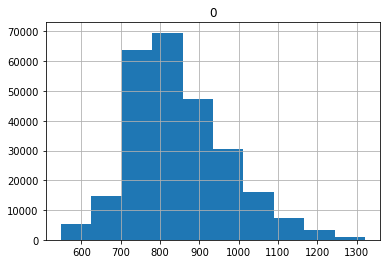

In [101]:
X_train.hist(column=0);

In [103]:
X_train[0].max(), X_train[0].min()

(1322.01695712, 547.4922213066667)

In [23]:
def print_n(n):
    for i in range(n):
        yield i

n = print_n(5)

- Write to excel:
    - Calculate all errors
    - Time
- implement order of cascades